<a href="https://colab.research.google.com/github/jennychen0223/DeepLearning_CIFAR-10_CNN/blob/main/CIFAR_10_3layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
print('train:', len(x_img_train))
print('test:', len(x_img_test))

train: 50000
test: 10000


In [4]:
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [6]:
y_label_train.shape

(50000, 1)

In [7]:
label_dict = {0:'airplane',
              1:'automobile',
              2:'bird',
              3:'cat',
              4:'deet',
              5:'dog',
              6:'frog',
              7:'horse',
              8:'ship',
              9:'truck'}

In [8]:
def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
  plt.gcf().set_size_inches(12, 14)

  if num>25: num=25
  for i in range(0, num):
    ax = plt.subplot(5,5,i+1)
    #顯示黑白圖片
    ax.imshow(images[start_id], cmap = 'binary')
    title = str(i) + ','+ label_dict[labels[i][0]]

    #有預測結果資料，才顯示結果
    if (len(predictions) > 0):
      title += '=>' + label_dict[predictions[i]]
                                 
    ax.set_title(title, fontsize=12)
    ax.set_xticks([]); ax.set_yticks([])
    start_id += 1
  plt.show()

預處理

In [9]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [10]:
x_img_train_normalize = x_img_train/255
x_img_test_normalize = x_img_test/255

In [11]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

In [12]:
y_label_train.shape

(50000, 1)

In [13]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
from keras.utils import np_utils

In [15]:
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)


In [16]:
y_label_train_OneHot.shape

(50000, 10)

In [17]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [19]:
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(32, 32, 3)                
                 ))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 ))
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
#卷積層2與池化層2
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'
                 ))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'
                 ))
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
#卷積層3與池化層3
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'
                 ))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'
                 ))
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
#建立神經網路（平坦層、隱藏層、輸出層）
model.add(Flatten())
model.add(Dropout(rate=0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation='softmax'))


In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [25]:
trian_history = model.fit(x_img_test_normalize, 
                          y_label_test_OneHot,
                          validation_split=0.2,
                          epochs=50,
                          batch_size=300,
                          verbose=1
                          )

Epoch 1/50
27/27 [==============================] - 50s 135ms/step - loss: 2.2898 - accuracy: 0.1124 - val_loss: 2.2668 - val_accuracy: 0.1105
Epoch 2/50
27/27 [==============================] - 2s 77ms/step - loss: 2.0898 - accuracy: 0.2200 - val_loss: 2.1890 - val_accuracy: 0.1890
Epoch 3/50
27/27 [==============================] - 2s 77ms/step - loss: 1.9666 - accuracy: 0.2651 - val_loss: 2.2556 - val_accuracy: 0.1960
Epoch 4/50
27/27 [==============================] - 2s 78ms/step - loss: 1.8301 - accuracy: 0.3048 - val_loss: 2.1298 - val_accuracy: 0.2325
Epoch 5/50
27/27 [==============================] - 2s 77ms/step - loss: 1.7099 - accuracy: 0.3654 - val_loss: 1.7886 - val_accuracy: 0.3530
Epoch 6/50
27/27 [==============================] - 2s 78ms/step - loss: 1.5897 - accuracy: 0.4031 - val_loss: 1.8436 - val_accuracy: 0.3550
Epoch 7/50
27/27 [==============================] - 2s 79ms/step - loss: 1.5041 - accuracy: 0.4405 - val_loss: 1.7051 - val_accuracy: 0.4040
Epoch 8/50


In [26]:
#評估模型準確率
scores = model.evaluate(x_img_test_normalize,
                        y_label_test_OneHot,
                        verbose=0)
scores[1]

0.9156000018119812

In [27]:
#分析訓練結果圖
import matplotlib.pyplot as plt
def show_train_history(show_train_value,test_value):
    plt.plot(trian_history.history[show_train_value])
    plt.plot(trian_history.history[test_value])
    plt.title('Train History')
    plt.ylabel(show_train_value)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

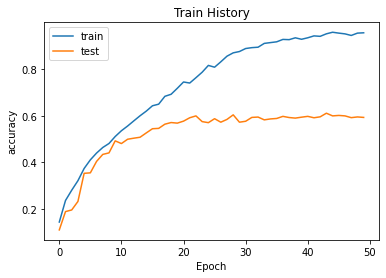

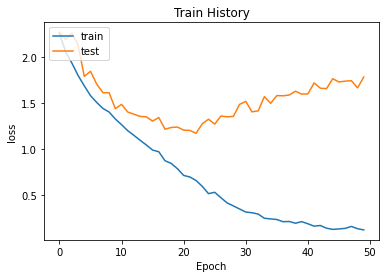

In [28]:
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

In [29]:
#使用model進行預測
prediction =  model.predict_classes(x_img_test_normalize)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
prediction[0:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [31]:
import matplotlib.pyplot as plt

label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10,color='red') 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

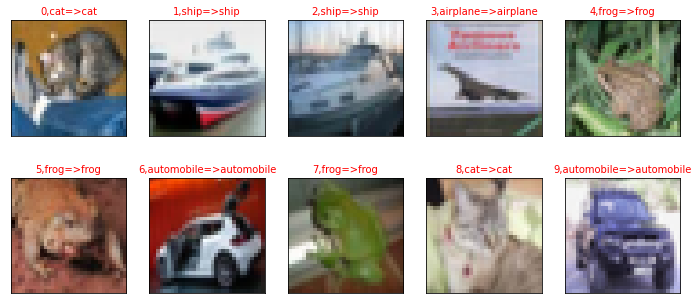

In [32]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0, 10)

In [33]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [34]:
#cifar 查看預測機率
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: ship predict: ship


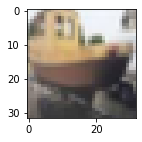

airplane Probability:0.000002038
automobile Probability:0.000026816
bird Probability:0.000001335
cat Probability:0.000009763
deer Probability:0.000000017
dog Probability:0.000000074
frog Probability:0.000000216
horse Probability:0.000000001
ship Probability:0.999930501
truck Probability:0.000029218


In [35]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,1002)

label: airplane predict: airplane


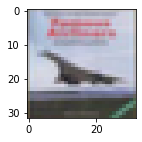

airplane Probability:0.922051907
automobile Probability:0.000005289
bird Probability:0.000591852
cat Probability:0.000003296
deer Probability:0.000039383
dog Probability:0.000001683
frog Probability:0.000000153
horse Probability:0.000000114
ship Probability:0.077288099
truck Probability:0.000018187


In [36]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

混淆矩陣

In [37]:
prediction.shape

(10000,)

In [38]:
y_label_test.shape

(10000, 1)

In [39]:
#轉換成一維陣列
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [40]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction, rownames=['label'], colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,925,7,6,8,4,5,0,2,39,4
1,4,947,2,10,3,3,5,0,6,20
2,16,0,898,31,31,9,12,3,0,0
3,1,3,20,894,14,38,19,8,1,2
4,4,0,32,14,915,12,8,12,2,1
5,0,0,19,50,11,903,7,7,1,2
6,1,1,16,22,24,8,915,6,4,3
7,4,0,17,16,29,18,3,905,6,2
8,11,12,3,8,7,6,4,0,945,4
